
## Analyze customer sentiment from twitter data for airlines to make business recommendations for improvement

In [8]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn import svm
from sklearn import tree
from IPython.display import Image # displaying images files in jupyter
from IPython.display import IFrame # displaying pdf file in jupyter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import scipy 
import scipy.stats as stats

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import re
import string

import matplotlib.pyplot as plt

In [9]:
# Input and clean up data by removing columns not useful for analysis
tweets = pd.read_csv('Tweets.csv')
del tweets['tweet_id']
del tweets['retweet_count']
del tweets['tweet_coord']
del tweets['name']
del tweets['airline_sentiment_gold']
del tweets['tweet_created']
del tweets['user_timezone']
tweets.head() 

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,negativereason_gold,text,tweet_location
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,@VirginAmerica What @dhepburn said.,NaN
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,@VirginAmerica plus you've added commercials t...,NaN
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,@VirginAmerica I didn't today... Must mean I n...,Lets Play
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,@VirginAmerica it's really aggressive to blast...,NaN
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,@VirginAmerica and it's a really big bad thing...,NaN


In [10]:
# scanning data
print ("Airlines: ", tweets['airline'].dropna().unique())
print (" ")
print ("Sentiment: ", tweets['airline_sentiment'].dropna().unique())
print (" ")
print ("Negative comments: ", tweets['negativereason'].dropna().unique())
print (" ")
print ("Locations: ", tweets['tweet_location'].dropna().unique())

Airlines:  ['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']
 
Sentiment:  ['neutral' 'positive' 'negative']
 
Negative comments:  ['Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']
 
Locations:  ['Lets Play' 'San Francisco CA' 'Los Angeles' ..., 'Columbus, OH, USA'
 'Milwaukee County, Wisconsin' 'Nigeria,lagos']


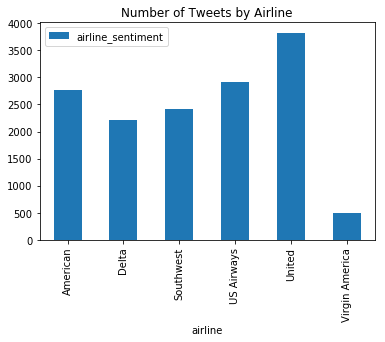

,airline_sentiment
airline,
American,2759
Delta,2222
Southwest,2420
US Airways,2913
United,3822
Virgin America,504


In [11]:
# Count of tweets by airline - sample size

df = tweets[['airline', 'airline_sentiment']]
a = pd.pivot_table(df, index = ['airline'], aggfunc = len)

a.plot(kind = 'bar', title = 'Number of Tweets by Airline')
plt.show()
a

In [12]:
# Predictive Modeling, predicted_sentiment based on twitter text.

tweets['predicted_sentiment'] = 'neutral' # to begin with, it will be replaced by prediction.
tweets_train, tweets_test = train_test_split(tweets, test_size=0.10, random_state=42)
print ("Training: ", tweets_train.shape)
print ("Test: ", tweets_test.shape)

Training:  (13176, 9)
Test:  (1464, 9)


In [15]:
# Twitter text processing

tweet_text = tweets_train['text']        # all the tweet text
str = tweet_text.str.lower().to_string() # dataframe to text for processing

tokens_training = nltk.word_tokenize(str)                            # tokenize
tokens_training = [i for i in tokens_training if i not in string.punctuation] # remove punctuation

stop_words = set(stopwords.words('english'))
tokens_training = [i for i in tokens_training if i not in stop_words]  # remove stop words
tokens_training = [i for i in tokens_training if   not i.isdigit()]    # remove numbers
tokens_training = [i for i in tokens_training if i.isalnum()]          # remove alpha numeric characters

tokens_training = list(set(tokens_training)) # Remove duplicates.
len(tokens_training)


7411

In [ ]:
# Can I Predict Sentiment of the tweet (Positive or Negative) based on training 
# compare that predicted _sentiment with sentiment and find accuracy.


In [ ]:
# Can I based on the features (Negative Comments, Airline, Tweet Text) predict Sentiment?
# Challenge features are descriptive (not 1/0) How to apply Tree, SVM, clustering?

In [ ]:
# Patrick I am moving this to end as it overwrites df and I am yet not sure where this segment will fit.
# Word counter test code

df = pd.DataFrame({'Comment': ['This has has words words words that are written twice twice', 'This is a comment without repetitions', 'This comment, has ponctuations!']}, index = [0, 1, 2])
df
#you must create the new column before trying to assing any value
df['Words'] = ""

#counting frequencies
i = 0
for row in df['Comment']:
    df['Words'][i] = str(Counter(row.split()).most_common())
    i+=1

print(df)

## References:

(1) Dataset - Kaggle

(2) www.nltk.org
